In [2]:
import matplotlib.pyplot as plt
import numpy as np

from skimage.io import imread # 이미지 읽기
from skimage.transform import resize # 이미지 크기 변경 가능

In [4]:
url = 'https://github.com/dknife/ML/raw/main/data/Proj1/40/'
imgR, imgC, channel = 24, 24, 3
images = []

for i in range(40):
  file = url + 'img{0:02d}.jpg'.format(i+1) # 이미지 파일 이름 생성
  img = imread(file) # 이미지 read
  img = resize(img, (imgR, imgC, channel))
  images.append(img)


<Figure size 432x288 with 0 Axes>

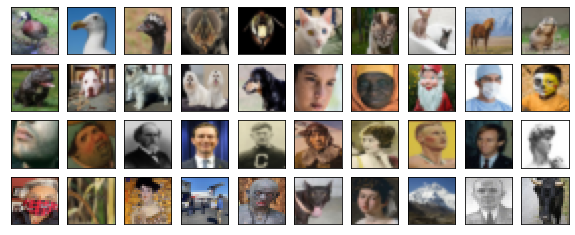

In [5]:
def plot_images(nRow, nCol, img):
  fig = plt.figure()
  fig, ax = plt.subplots(nRow, nCol, figsize = (nCol, nRow))
  for i in range(nRow):
    for j in range(nCol):
      if nRow <= 1: axis = ax[j]
      else: axis = ax[i, j]
      axis.get_xaxis().set_visible(False)
      axis.get_yaxis().set_visible(False)
      axis.imshow(img[i*nCol+j])

plot_images(4, 10, images)

In [6]:
X = np.array(images[:30])
X_test = np.array(images[30:])

<Figure size 432x288 with 0 Axes>

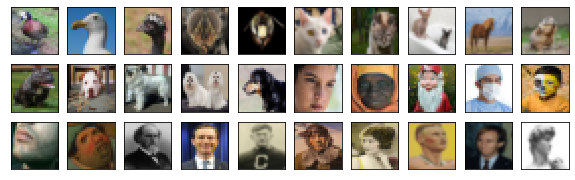

<Figure size 432x288 with 0 Axes>

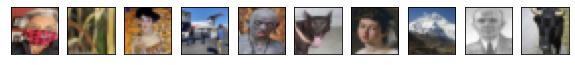

In [7]:
plot_images(3, 10, X)
plot_images(1, 10, X_test)

In [8]:
X_noisy = X + np.random.randn(len(X), imgR, imgC, channel) * 0.1
X_noisy = np.clip(X_noisy, 0, 1)
X_test_noisy = X_test + np.random.randn(len(X_test), imgR, imgC, channel)*0.1
X_test_noisy = np.clip(X_test_noisy, 0, 1)

<Figure size 432x288 with 0 Axes>

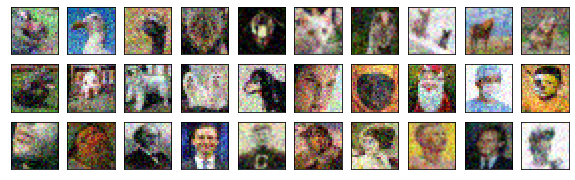

<Figure size 432x288 with 0 Axes>

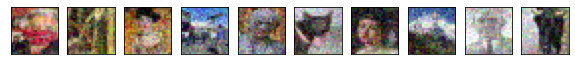

In [9]:
plot_images(3, 10, X_noisy)
plot_images(1, 10, X_test_noisy)

<Figure size 432x288 with 0 Axes>

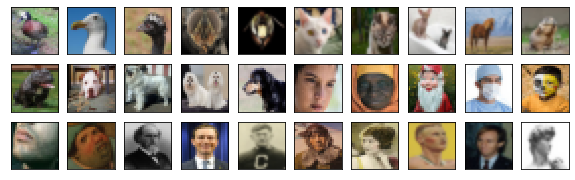

<Figure size 432x288 with 0 Axes>

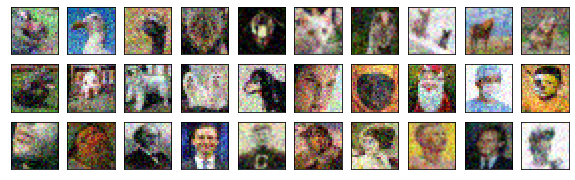

In [11]:
X_noisy_flat = X_noisy.reshape(-1, imgR*imgC*channel)
X_flat = np.array(X.reshape(-1, imgR*imgC*channel) * 255, dtype=np.uint)

plot_images(3, 10, X_flat.reshape(-1, imgR, imgC, channel))
plot_images(3, 10, X_noisy_flat.reshape(-1, imgR, imgC, channel))

In [12]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_noisy_flat, X_flat)

KNeighborsClassifier()

<Figure size 432x288 with 0 Axes>

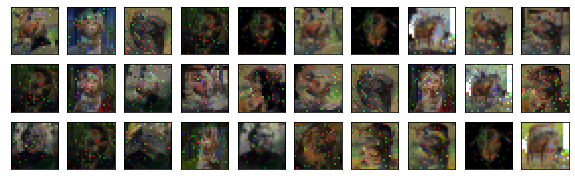

In [13]:
denoised_result = knn.predict(X_noisy_flat)
denoised_result = denoised_result.reshape(-1, imgR, imgC, channel)
plot_images(3, 10, denoised_result)

In [18]:
n_augmentation = 100
X_noisy_aug = X + np.random.randn(len(X), imgR, imgC, channel) * 0.2
y_label = np.array(X * 255, dtype = np.uint)
y = y_label

print(X_noisy.shape)
for i in range(n_augmentation):
  noisy_data = X + np.random.randn(len(X), imgR, imgC, channel) * 0.2
  X_noisy_aug = np.append(X_noisy_aug, noisy_data, axis = 0)
  y = np.append(y, y_label, axis = 0)

X_noisy_aug = np.clip(X_noisy_aug, 0, 1)
X_noisy_aug.shape, y.shape

(30, 24, 24, 3)


((3030, 24, 24, 3), (3030, 24, 24, 3))